In [2]:
import numpy as np
import pandas as pd
from scipy.io.arff import loadarff
import matplotlib.pyplot as plt
import seaborn as sns

raw_data = loadarff('dataset_42_soybean.arff')
df = pd.DataFrame(raw_data[0])

df

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,class
0,b'october',b'normal',b'gt-norm',b'norm',b'yes',b'same-lst-yr',b'low-areas',b'pot-severe',b'none',b'90-100',...,b'absent',b'norm',b'dna',b'norm',b'absent',b'absent',b'norm',b'absent',b'norm',b'diaporthe-stem-canker'
1,b'august',b'normal',b'gt-norm',b'norm',b'yes',b'same-lst-two-yrs',b'scattered',b'severe',b'fungicide',b'80-89',...,b'absent',b'norm',b'dna',b'norm',b'absent',b'absent',b'norm',b'absent',b'norm',b'diaporthe-stem-canker'
2,b'july',b'normal',b'gt-norm',b'norm',b'yes',b'same-lst-yr',b'scattered',b'severe',b'fungicide',b'lt-80',...,b'absent',b'norm',b'dna',b'norm',b'absent',b'absent',b'norm',b'absent',b'norm',b'diaporthe-stem-canker'
3,b'july',b'normal',b'gt-norm',b'norm',b'yes',b'same-lst-yr',b'scattered',b'severe',b'none',b'80-89',...,b'absent',b'norm',b'dna',b'norm',b'absent',b'absent',b'norm',b'absent',b'norm',b'diaporthe-stem-canker'
4,b'october',b'normal',b'gt-norm',b'norm',b'yes',b'same-lst-two-yrs',b'scattered',b'pot-severe',b'none',b'lt-80',...,b'absent',b'norm',b'dna',b'norm',b'absent',b'absent',b'norm',b'absent',b'norm',b'diaporthe-stem-canker'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,b'april',b'?',b'?',b'?',b'?',b'?',b'upper-areas',b'?',b'?',b'?',...,b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'?',b'2-4-d-injury'
679,b'april',b'lt-normal',b'?',b'lt-norm',b'?',b'diff-lst-year',b'scattered',b'?',b'?',b'?',...,b'?',b'dna',b'?',b'?',b'?',b'?',b'?',b'?',b'rotted',b'herbicide-injury'
680,b'june',b'lt-normal',b'?',b'lt-norm',b'?',b'diff-lst-year',b'scattered',b'?',b'?',b'?',...,b'?',b'dna',b'?',b'?',b'?',b'?',b'?',b'?',b'rotted',b'herbicide-injury'
681,b'april',b'lt-normal',b'?',b'lt-norm',b'?',b'same-lst-yr',b'whole-field',b'?',b'?',b'?',...,b'?',b'dna',b'?',b'?',b'?',b'?',b'?',b'?',b'rotted',b'herbicide-injury'


# Decoding Byte Literals to Strings

When viewing the dataframe, we note that each of the values in the dataframe are being read as byte literals rather than regular strings. Hence, the first step we need to do before proceeding is converting the byte literals back to regular strings through the utf-8 decoder. 

In [3]:
for column in df.columns:
    if df[column].dtype == object:
        df[column] = df[column].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

df.head(3)

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,class
0,october,normal,gt-norm,norm,yes,same-lst-yr,low-areas,pot-severe,none,90-100,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
1,august,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,severe,fungicide,80-89,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
2,july,normal,gt-norm,norm,yes,same-lst-yr,scattered,severe,fungicide,lt-80,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker


In [4]:
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             683 non-null    object
 1   plant-stand      683 non-null    object
 2   precip           683 non-null    object
 3   temp             683 non-null    object
 4   hail             683 non-null    object
 5   crop-hist        683 non-null    object
 6   area-damaged     683 non-null    object
 7   severity         683 non-null    object
 8   seed-tmt         683 non-null    object
 9   germination      683 non-null    object
 10  plant-growth     683 non-null    object
 11  leaves           683 non-null    object
 12  leafspots-halo   683 non-null    object
 13  leafspots-marg   683 non-null    object
 14  leafspot-size    683 non-null    object
 15  leaf-shread      683 non-null    object
 16  leaf-malf        683 non-null    object
 17  leaf-mild        683 non-null    ob

It seems like there are no null values or rows with any empty values. However, there are other methods to check for this that we'll employ just to make sure there are no null values.

The first method is to read through the soybean dataset description found in the `dataset_42_soybean.arff` file.
Section 4 in the commented notes for this file states that "An unknown value is encoded as ``?``". 

Hence, rather than NaN being recorded for missing values, the ``?`` is used instead to denote a missing value.

In [5]:

df[(df == '?')].count()

date                 1
plant-stand         36
precip              38
temp                30
hail               121
crop-hist           16
area-damaged         1
severity           121
seed-tmt           121
germination        112
plant-growth        16
leaves               0
leafspots-halo      84
leafspots-marg      84
leafspot-size       84
leaf-shread        100
leaf-malf           84
leaf-mild          108
stem                16
lodging            121
stem-cankers        38
canker-lesion       38
fruiting-bodies    106
external-decay      38
mycelium            38
int-discolor        38
sclerotia           38
fruit-pods          84
fruit-spots        106
seed                92
mold-growth         92
seed-discolor      106
seed-size           92
shriveling         106
roots               31
class                0
dtype: int64

We can actually see that there are plenty of ``?`` values representing the ``NaN`` value. So, it is important for us to remove these otherwise we'll be feeding our model unclean data.

So we'll be using the pandas drop method and filter out all rows with the ``?``

### How?

We'll be using the df[(df=='?')] which will do two things, firstly the df=='?' will return a dataframe that will consist of boolean values where True represents the location in which the ``?`` is found. Next the df[] will return a dataframe but instead, the values will be returned as ``NaN``.

In [6]:
df.drop(df[(df == '?').any(axis=1)].index, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 562 entries, 0 to 646
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             562 non-null    object
 1   plant-stand      562 non-null    object
 2   precip           562 non-null    object
 3   temp             562 non-null    object
 4   hail             562 non-null    object
 5   crop-hist        562 non-null    object
 6   area-damaged     562 non-null    object
 7   severity         562 non-null    object
 8   seed-tmt         562 non-null    object
 9   germination      562 non-null    object
 10  plant-growth     562 non-null    object
 11  leaves           562 non-null    object
 12  leafspots-halo   562 non-null    object
 13  leafspots-marg   562 non-null    object
 14  leafspot-size    562 non-null    object
 15  leaf-shread      562 non-null    object
 16  leaf-malf        562 non-null    object
 17  leaf-mild        562 non-null    object


Each row that has previously contained a ``?`` has been deleted leaving us with 562 instances for us to classify.

According to the dataset description, there are 19 Classes = ``{diaporthe-stem-canker, charcoal-rot, rhizoctonia-root-rot, phytophthora-rot, brown-stem-rot, powdery-mildew, downy-mildew, brown-spot, bacterial-blight, bacterial-pustule, purple-seed-stain, anthracnose, phyllosticta-leaf-spot, alternarialeaf-spot, frog-eye-leaf-spot, diaporthe-pod-&-stem-blight, cyst-nematode, 2-4-d-injury, herbicide-injury}``; however, only 15 are present

['diaporthe-stem-canker', 'charcoal-rot', 'rhizoctonia-root-rot', 'phytophthora-rot', 'brown-stem-rot', 'powdery-mildew', 'downy-mildew', 'brown-spot', 'bacterial-blight', 'bacterial-pustule', 'purple-seed-stain', 'anthracnose', 'phyllosticta-leaf-spot', 'alternarialeaf-spot', 'frog-eye-leaf-spot'] 
 15


C:\Users\Brandon\AppData\Local\Temp\ipykernel_1388\535338292.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['class'], edgecolor=sns.color_palette("dark", 15), palette=sns.color_palette("hls",15), order = df['class'].value_counts().index)


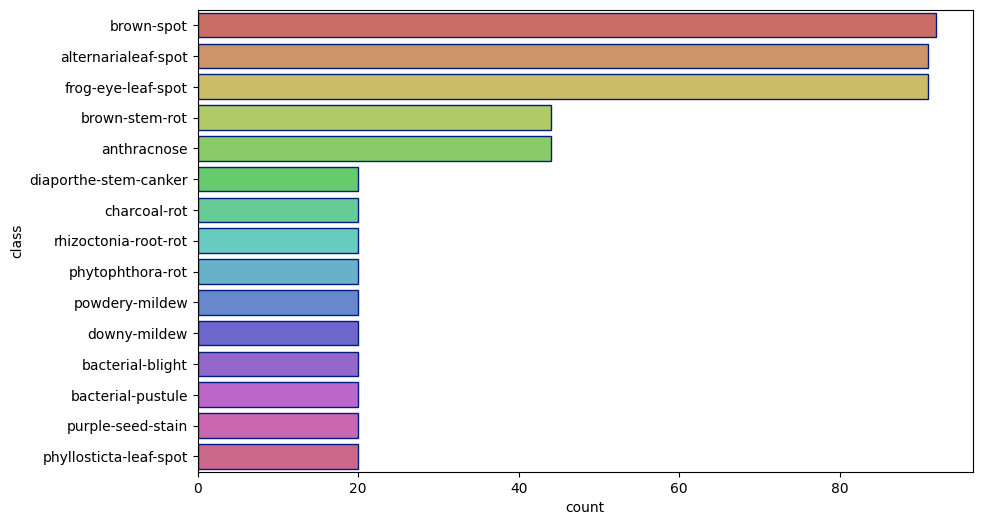

In [8]:
print(df['class'].unique().tolist(), "\n", len(df['class'].unique().tolist()))

df['class'].value_counts()

# https://seaborn.pydata.org/tutorial/color_palettes.html for color palettes
plt.figure(figsize=(10, 6))
sns.countplot(df['class'], edgecolor=sns.color_palette("dark", 15), palette=sns.color_palette("hls",15), order = df['class'].value_counts().index)
plt.xticks(rotation=-0)
plt.show()

What's next?

The next thing to do will be to compute the correlation that exists between all categorical data with the final ``class`` column. 
If we were to use a Pearsons correlation plot, we'd need to label encode all categorical attributes. Instead, we can use something called the Cramer's V. The cramer's V uses the chi value in order to provide us a value between 0 and 1. It measures how strongly correlated 2 categorical fields are. 

After doing this, we'll filter out all attributes with a cramer's V less than a certain threshold level. This can act as our first method of feature selection.

In [9]:
from scipy.stats import chi2_contingency

features = []

for column in df.columns:
    contingency_table = pd.crosstab(df['class'], df[column])
    # Chisquare test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Cramer's V calculation
    n = contingency_table.sum().sum()  # Total observations
    min_dim = min(contingency_table.shape) - 1  # Minimum dimension
    cramers_v = np.sqrt(chi2 / (n * min_dim))

    if cramers_v>0.4 and column!='class':
        features.append(column)
        print(f"Values for Column {column}: \n\tChi:{chi2}, \n\tp:{p}, \n\tdof:{dof}, \n\tcramer_v:{cramers_v}\n")

Values for Column plant-stand: 
	Chi:110.36641637112126, 
	p:4.750139170776433e-17, 
	dof:14, 
	cramer_v:0.44314955014309865

Values for Column precip: 
	Chi:564.0413041741467, 
	p:3.9790229950404105e-101, 
	dof:28, 
	cramer_v:0.7083897987100751

Values for Column temp: 
	Chi:373.89942984321596, 
	p:3.784681997690371e-62, 
	dof:28, 
	cramer_v:0.5767588216010884

Values for Column severity: 
	Chi:344.72778267687204, 
	p:2.8620132502698084e-56, 
	dof:28, 
	cramer_v:0.5538025961918367

Values for Column plant-growth: 
	Chi:341.0460097021477, 
	p:3.101891459997271e-64, 
	dof:14, 
	cramer_v:0.7790015620226411

Values for Column leaves: 
	Chi:312.01086334310855, 
	p:3.6823597709772994e-58, 
	dof:14, 
	cramer_v:0.7451036653652715

Values for Column leafspots-halo: 
	Chi:839.6529011632123, 
	p:9.793611665016568e-159, 
	dof:28, 
	cramer_v:0.8643044336689459

Values for Column leafspots-marg: 
	Chi:980.42477122377, 
	p:1.976192187275859e-188, 
	dof:28, 
	cramer_v:0.9339507649431386

Values for C

Now, we're going to try creating a very simple ``decision tree`` using the features found after performing our first feature selection method.

We'll call the sklearn DecisionTreeClassifier built in function to build the tree. We're going to create a train-test split using a 80%-20% split.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in features:
    df[column] = le.fit_transform(df[column])

x_train, x_test, y_train, y_test = train_test_split(df[features], df['class'], test_size=0.2, random_state=42)

tree_clf = DecisionTreeClassifier()
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [11]:
y_pred = tree_clf.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8584070796460177


We see that the test accuracy is 85.8%. We can generalize what the accuracy will be using cross validation techniques like LOOCV or K-Fold CV; however, being the first method we try, we'll keep this accuracy based off 1 measurement.

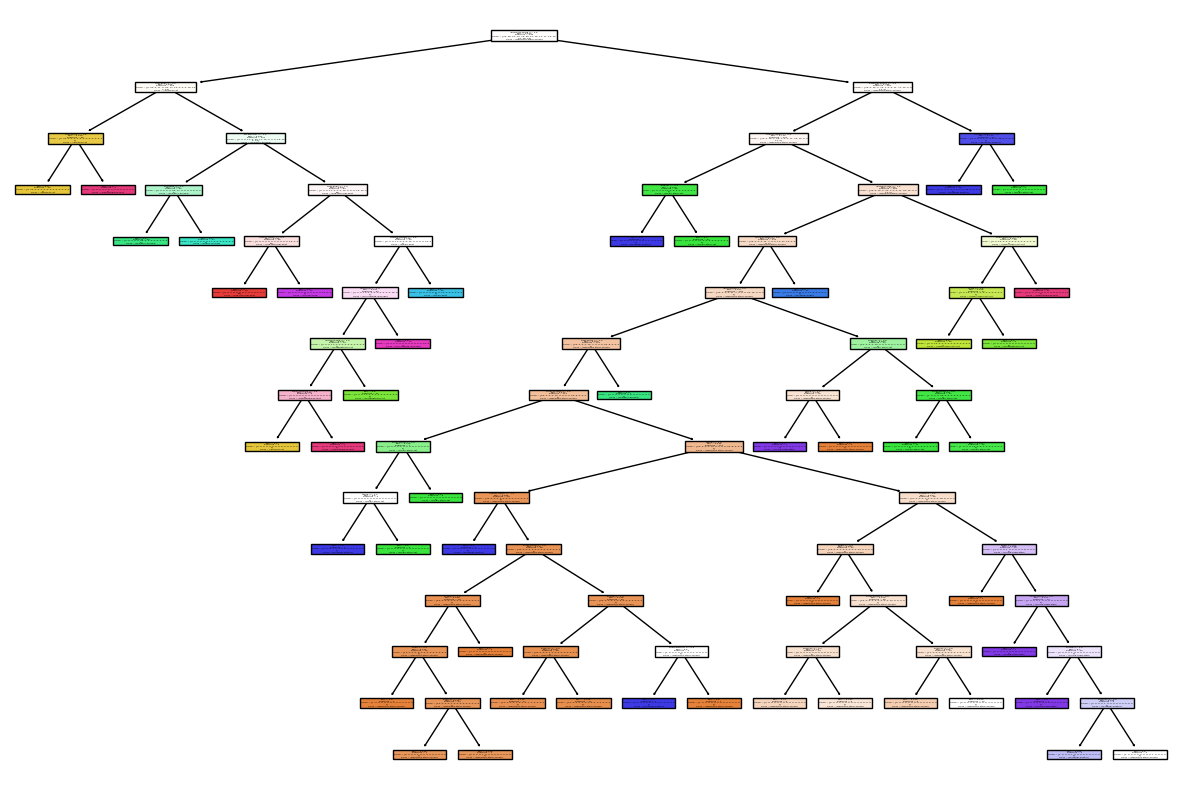

In [12]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(tree_clf, 
                   feature_names=features,  
                   class_names=df['class'].unique().tolist(),
                   filled=True)

And this is how the tree looks like. There are plenty of branches; however, we notice that there are plenty of branches that seem to be redundant as seen by the orange color on the bottom left section of the tree plot.t So there definitey some improvements that can be made like tree pruning or a different method of feature selection like recursive feature extraction. 

We'll try using RFE to see if we get any better prediction accuracy

In [13]:
from sklearn.feature_selection import RFE


clf = DecisionTreeClassifier(random_state=42)

rfe = RFE(estimator=clf, n_features_to_select=10)

rfe.fit(x_train, y_train)

print("Features sorted by their rank:")
new_features = (sorted(zip(map(lambda x: x, rfe.ranking_), x_train.columns)))
new_features = [feature[1] for feature in new_features]

# print(features[:15])
print(new_features[:15])

x_train_rfe = rfe.transform(x_train)
x_test_rfe = rfe.transform(x_test)

tree_clf_rfe = DecisionTreeClassifier()
tree_clf_rfe.fit(x_train_rfe, y_train)

y_pred_rfe = tree_clf_rfe.predict(x_test_rfe)

print("Accuracy:", accuracy_score(y_test, y_pred_rfe))



Features sorted by their rank:
['canker-lesion', 'external-decay', 'fruit-pods', 'fruiting-bodies', 'int-discolor', 'leaf-mild', 'leafspot-size', 'leafspots-marg', 'severity', 'temp', 'leaf-shread', 'precip', 'plant-growth', 'plant-stand', 'roots']
Accuracy: 0.8584070796460177


The accuracy seems to be the same when using the new RFE method for feature selection. This can act as a testament to the efficacy of Cramer's V for feature selection. Next we'll plot the tree and see if it's still as dense as the previous one.

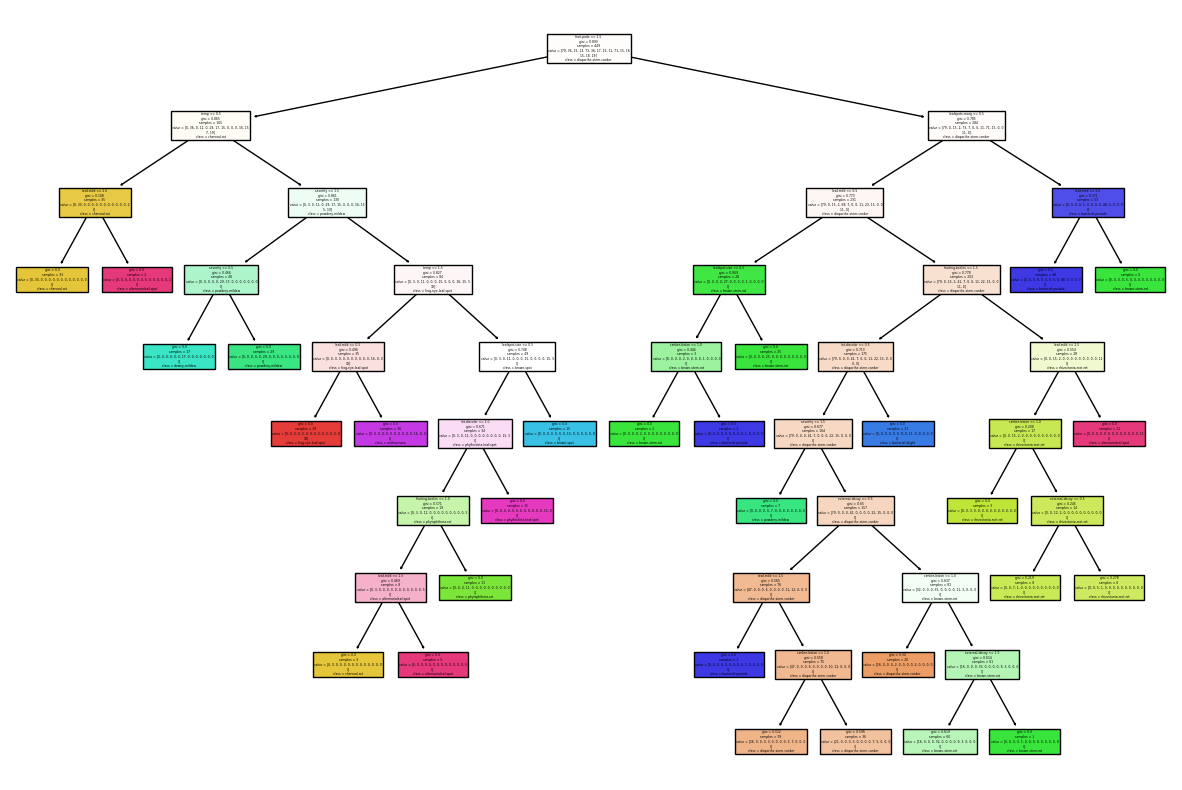

In [14]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(tree_clf_rfe, 
                   feature_names=new_features,  
                   class_names=df['class'].unique().tolist(),
                   filled=True)

The tree is comparatively less dense as there are less unnecessary branches and repeated classes towards the leaves. 

Side Note: if you want to clearly see the splitting condition, increase the figure plot size to an absurdly high number like 60,50. The resolution will go up with it. 

The next and final method to try will be cost complexity pruning. 

Before exploring the efficacy of CCP, we'll go over a few basics of how it works.

Firstly, a tree is generated using regular split coniditions like the gini index as a measurement of node purity. Next, we'll undergo the tree pruning method to try improving the classification accuracy

In [15]:
# Cost complexity pruning improvement:
df

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,class
0,october,1,0,2,yes,same-lst-yr,low-areas,1,none,90-100,...,0,2,3,1,0,0,1,0,1,diaporthe-stem-canker
1,august,1,0,2,yes,same-lst-two-yrs,scattered,2,fungicide,80-89,...,0,2,3,1,0,0,1,0,1,diaporthe-stem-canker
2,july,1,0,2,yes,same-lst-yr,scattered,2,fungicide,lt-80,...,0,2,3,1,0,0,1,0,1,diaporthe-stem-canker
3,july,1,0,2,yes,same-lst-yr,scattered,2,none,80-89,...,0,2,3,1,0,0,1,0,1,diaporthe-stem-canker
4,october,1,0,2,yes,same-lst-two-yrs,scattered,1,none,lt-80,...,0,2,3,1,0,0,1,0,1,diaporthe-stem-canker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,august,1,0,0,yes,same-lst-yr,whole-field,1,fungicide,90-100,...,0,0,2,1,0,0,1,0,1,frog-eye-leaf-spot
643,september,1,0,2,yes,same-lst-two-yrs,scattered,0,none,80-89,...,0,0,2,1,0,0,1,0,1,frog-eye-leaf-spot
644,october,0,0,0,yes,same-lst-sev-yrs,low-areas,0,fungicide,lt-80,...,0,0,2,1,0,0,1,0,1,frog-eye-leaf-spot
645,august,1,0,2,yes,same-lst-yr,upper-areas,1,none,90-100,...,0,0,2,1,0,0,1,0,1,frog-eye-leaf-spot


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()

features = df.columns.tolist()
features.remove('class')    

# How Cost Complexity Pruning works

Basically, a recursive function is run to find the node with the "weakest link". This weakest link is characterized by an effective alpha value where any node with low effective alpha values are removed first. 

We try to minimize the following mathematical expression:

``R_alpha(T) = R(T) + alpha*|T|``

R(T) - Train error found in leaves
|T| - NUmber of leaf nodes
alpha - Complexity parameter (regularizer)

In [17]:
le = LabelEncoder()
for feature in features:
    df[feature] = le.fit_transform(df[feature])

x_train, x_test, y_train, y_test = train_test_split(df[features], df['class'], test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(x_train, y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

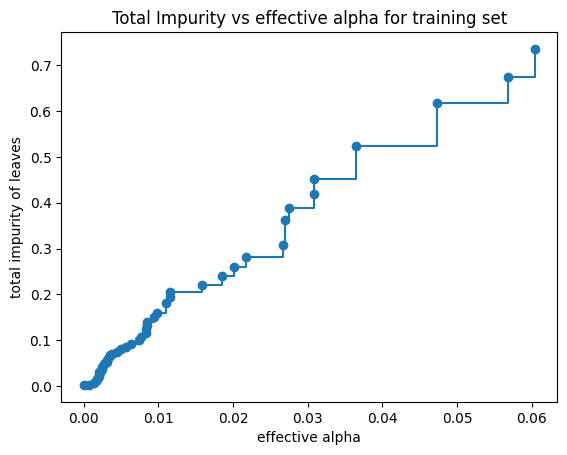

In [18]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

Here, we'll be building multiple trees using different effective alpha values, the last effective alpha is a tree where the whole tree is pruned. 

In [19]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07854682694905574


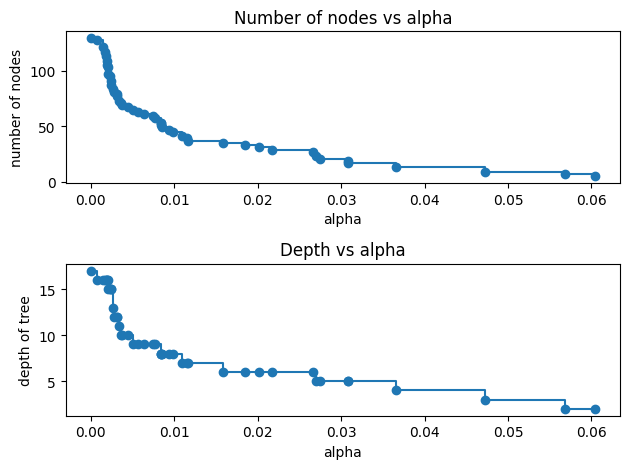

In [20]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

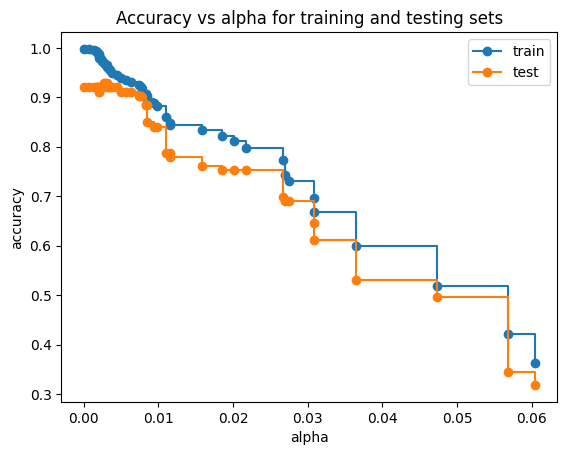

In [21]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

The learning curve here shows the accuracy of different trees for different values of alpha. When the value of alpha is 0, we have a high accuracy for both test and train values. As we begin to increase the value of alpha, the overall accuracy decreases for both train and test. 

Ultimately, our goal is to find the value of alpha so that the test accuracy is at its highest. To do we'll just be finding the index of the maximum score and use that to find the accuracy of the best decision tree. That corresponds to an accuracy of ``93%`` with ccp_alpha of ``0.00267``.

In [22]:
print(test_scores[test_scores.index(max(test_scores))])
print(ccp_alphas[test_scores.index(max(test_scores))])

0.9292035398230089
0.0026726057906458797


In [23]:
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alphas[test_scores.index(max(test_scores))])
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0026726057906458797, random_state=42)

In [24]:
predictions = clf.predict(x_test)
accuracy = accuracy_score(y_test, predictions)

print(accuracy)

0.9292035398230089


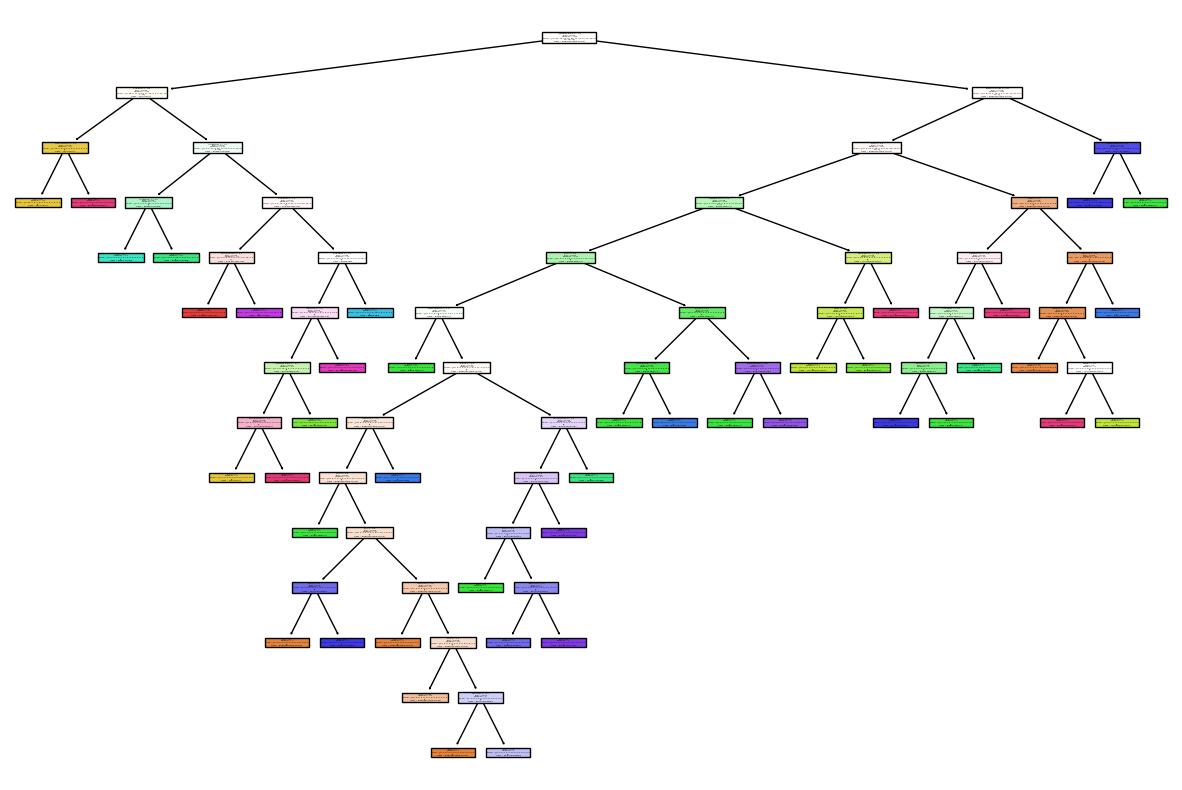

In [25]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf, 
                   feature_names=features,
                   class_names=df['class'].unique().tolist(),
                   filled=True)

In [26]:
from sklearn.metrics import f1_score

score = f1_score(y_test, predictions, average='weighted')
score

0.9317044750673069